# **Potato Disease Prediction using Convolution Neural Network**

# **Importing the Essential Libraries Required for Disease Prediction Using CNN**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.models import load_model
from keras.layers import Dense,Flatten,MaxPooling2D,Dropout,Conv2D
from keras.applications.vgg16 import VGG16
import cv2

# **Preparation of Training And Validation Data**

In [14]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/kaggle/input/potato-disease-prediction-dataset/potato_early_late/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'/kaggle/input/potato-disease-prediction-dataset/potato_early_late/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1412 files belonging to 2 classes.
Found 588 files belonging to 2 classes.


# **Normalization of Image Data**

In [15]:
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


# **Convulution Neural Network for Potato Disease Prediction**

In [16]:
model=Sequential()

model.add(Conv2D(100,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(80,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 100)     2800      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 100)     0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      57664     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)       

# **Compilation of Model**

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **Fitting the CNN Model on Training Data and Validation Data**


In [18]:
backend=model.fit(train_ds,epochs=7,validation_data=validation_ds)

Epoch 1/7
45/45 [==============================] - 9s 134ms/step - loss: 0.5870 - accuracy: 0.6686 - val_loss: 0.3351 - val_accuracy: 0.9031
Epoch 2/7
45/45 [==============================] - 6s 125ms/step - loss: 0.2913 - accuracy: 0.8959 - val_loss: 0.2938 - val_accuracy: 0.8827
Epoch 3/7
45/45 [==============================] - 6s 127ms/step - loss: 0.2271 - accuracy: 0.9143 - val_loss: 0.2746 - val_accuracy: 0.8690
Epoch 4/7
45/45 [==============================] - 6s 126ms/step - loss: 0.1895 - accuracy: 0.9384 - val_loss: 0.1825 - val_accuracy: 0.9354
Epoch 5/7
45/45 [==============================] - 6s 126ms/step - loss: 0.1491 - accuracy: 0.9469 - val_loss: 0.1439 - val_accuracy: 0.9371
Epoch 6/7
45/45 [==============================] - 6s 126ms/step - loss: 0.1545 - accuracy: 0.9441 - val_loss: 0.1485 - val_accuracy: 0.9405
Epoch 7/7
45/45 [==============================] - 6s 126ms/step - loss: 0.1412 - accuracy: 0.9483 - val_loss: 0.1680 - val_accuracy: 0.9524


# **Visualization of CNN Model's Performance Over Training and Validation Data**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


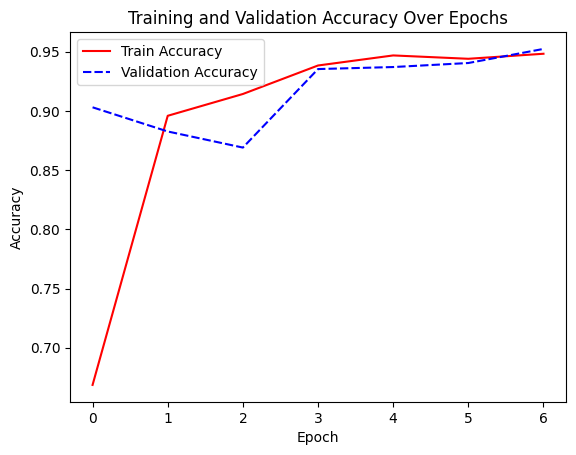

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


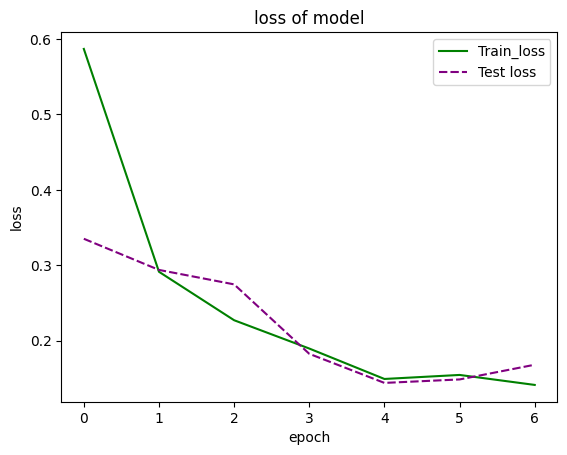

In [19]:
# Training and Validation Accuracy of CNN Model

history_df = pd.DataFrame({
    'Train Accuracy': backend.history['accuracy'],
    'Validation Accuracy': backend.history['val_accuracy']
})


sns.lineplot(data=history_df, palette=['red', 'blue'])


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')


plt.show()

# Training and Validation Loss of CNN Model

loss_df=pd.DataFrame({
    'Train_loss':backend.history['loss'],
    'Test loss':backend.history['val_loss']
})


sns.lineplot(data=loss_df,palette=['green','purple'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss of model')
plt.show()


# **Testing the CNN Model on Unseen Images of Potato Diseases, Early Blight and Late Blight**

In [20]:
# Testing the model over Early Blight of Potato Disease

image=cv2.imread('/kaggle/input/testing/early.jpeg')

image_input=cv2.resize(image,(256,256))

image_input_model=image_input.reshape(1,256,256,3)

image_input_model = image_input_model / 255.0

prediction=model.predict(image_input_model)

if prediction[0][0]>0.5:
  print(f'late blight with the probability of {prediction}')
else:
  print(f'early blight with the probability of {prediction}')

1/1 [==============================] - 0s 173ms/step
early blight with the probability of [[1.0071935e-15]]


In [21]:
# Testing the model over Early Blight of Potato Disease

image=cv2.imread('/kaggle/input/testing/late_blight.jpeg')

image_input=cv2.resize(image,(256,256))

image_input_model=image_input.reshape(1,256,256,3)

image_input_model = image_input_model / 255.0

prediction=model.predict(image_input_model)


# print(f'Prediction of CNN Model : {np.round(prediction[0][0],2):.2f}')

if prediction>0.5:
  print(f'late blight with the probability of : {np.round(prediction[0][0],2):.2f} %')
else:
  print(f'early blight with the probability of : {np.round(prediction[0][0],2):.2f} %')


1/1 [==============================] - 0s 20ms/step
late blight with the probability of : 0.86 %


# **Saving the Trained Model**

In [22]:
model.save('F:\Python\CNN\potato_disease_identification\dummy_data', save_format='tf')
